<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/HP_Inc_(HPQ).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  yfinance

     |████████████████████████████████| 5.5MB 20.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=c560dd3b4d0ca513bef05b27dda7f00380151d634ee7924ab28c1409974baf96
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

In [3]:
HPQ = "HPQ" 

In [4]:
HPQ = yfinance.download(HPQ)

HPQ

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.131273,0.131273,0.124177,0.124177,0.046861,2480300
1962-01-03,0.124177,0.124177,0.121516,0.122846,0.046359,507300
1962-01-04,0.122846,0.126838,0.117968,0.120185,0.045355,845500
1962-01-05,0.119742,0.119742,0.117525,0.117525,0.044351,338200
1962-01-08,0.117525,0.119299,0.115307,0.119299,0.045020,873700
...,...,...,...,...,...,...
2020-11-16,19.889999,20.389999,19.740000,20.299999,20.299999,11140100
2020-11-17,20.030001,20.900000,19.850000,20.500000,20.500000,12321500
2020-11-18,20.610001,20.950001,20.440001,20.450001,20.450001,9110300


In [5]:
HPQ.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.131273,0.131273,0.124177,0.124177,0.046861,2480300
1962-01-03,0.124177,0.124177,0.121516,0.122846,0.046359,507300
1962-01-04,0.122846,0.126838,0.117968,0.120185,0.045355,845500
1962-01-05,0.119742,0.119742,0.117525,0.117525,0.044351,338200
1962-01-08,0.117525,0.119299,0.115307,0.119299,0.045020,873700


In [6]:
HPQ.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-16,19.889999,20.389999,19.740000,20.299999,20.299999,11140100
2020-11-17,20.030001,20.900000,19.850000,20.500000,20.500000,12321500
2020-11-18,20.610001,20.950001,20.440001,20.450001,20.450001,9110300
2020-11-19,20.360001,20.580000,20.129999,20.500000,20.500000,5731600
2020-11-20,20.520000,20.690001,20.330000,20.450001,20.450001,7255900


In [7]:
HPQ.describe()

,Open,High,Low,Close,Adj Close,Volume
count,14826.000000,14826.000000,14826.000000,14826.000000,14826.000000,1.482600e+04
mean,7.448828,7.556570,7.350205,7.454343,5.330477,1.476492e+07
std,7.761431,7.874538,7.657600,7.767534,6.216294,1.741898e+07
min,0.054106,0.057210,0.054106,0.054106,0.020418,5.630000e+04
25%,0.621771,0.626206,0.616450,0.621771,0.273558,3.621800e+06
50%,3.331488,3.381159,3.285366,3.335036,1.585488,9.979850e+06
75%,13.623979,13.828338,13.401453,13.623979,9.426041,1.976542e+07
max,34.826294,35.422344,33.293598,35.422344,24.658939,4.420123e+08


In [8]:
HPQ.info

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.450001  

In [9]:
HPQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14826 entries, 1962-01-02 to 2020-11-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       14826 non-null  float64
 1   High       14826 non-null  float64
 2   Low        14826 non-null  float64
 3   Close      14826 non-null  float64
 4   Adj Close  14826 non-null  float64
 5   Volume     14826 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 810.8 KB


In [10]:
conn = sqlite3.connect("HPQ.db")
c = conn.cursor()

In [11]:
conn = sqlite3.connect("HPQ.db")
c = conn.cursor()

In [12]:
HPQ.to_sql("HPQ", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [13]:
#See data
c.execute("""SELECT * FROM HPQ""")
rows = c.fetchall()
rows

[('1962-01-02 00:00:00',
  0.13127270340919495,
  0.13127270340919495,
  0.12417688220739365,
  0.12417688220739365,
  0.046861108392477036,
  2480300),
 ('1962-01-03 00:00:00',
  0.12417688220739365,
  0.12417688220739365,
  0.12151595205068588,
  0.12284641712903976,
  0.04635900631546974,
  507300),
 ('1962-01-04 00:00:00',
  0.12284641712903976,
  0.126837819814682,
  0.11796803772449493,
  0.120185486972332,
  0.04535485804080963,
  845500),
 ('1962-01-05 00:00:00',
  0.1197419986128807,
  0.1197419986128807,
  0.11752454936504364,
  0.11752454936504364,
  0.044350676238536835,
  338200),
 ('1962-01-08 00:00:00',
  0.11752454936504364,
  0.11929851025342941,
  0.11530710756778717,
  0.11929851025342941,
  0.045020148158073425,
  873700),
 ('1962-01-09 00:00:00',
  0.11929851025342941,
  0.12417688220739365,
  0.11796803772449493,
  0.12107246369123459,
  0.04568956419825554,
  930100),
 ('1962-01-10 00:00:00',
  0.12107246369123459,
  0.12195944041013718,
  0.11929851025342941,
  

In [14]:
HPQ.to_excel("HPQ.xls")

pd.read_excel("HPQ.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.131273,0.131273,0.124177,0.124177,0.046861,2480300
1,1962-01-03,0.124177,0.124177,0.121516,0.122846,0.046359,507300
2,1962-01-04,0.122846,0.126838,0.117968,0.120185,0.045355,845500
3,1962-01-05,0.119742,0.119742,0.117525,0.117525,0.044351,338200
4,1962-01-08,0.117525,0.119299,0.115307,0.119299,0.045020,873700
...,...,...,...,...,...,...,...
14821,2020-11-16,19.889999,20.389999,19.740000,20.299999,20.299999,11140100
14822,2020-11-17,20.030001,20.900000,19.850000,20.500000,20.500000,12321500
14823,2020-11-18,20.610001,20.950001,20.440001,20.450001,20.450001,9110300
14824,2020-11-19,20.360001,20.580000,20.129999,20.500000,20.500000,5731600


In [15]:
HPQ.Close

Date
1962-01-02     0.124177
1962-01-03     0.122846
1962-01-04     0.120185
1962-01-05     0.117525
1962-01-08     0.119299
                ...    
2020-11-16    20.299999
2020-11-17    20.500000
2020-11-18    20.450001
2020-11-19    20.500000
2020-11-20    20.450001
Name: Close, Length: 14826, dtype: float64

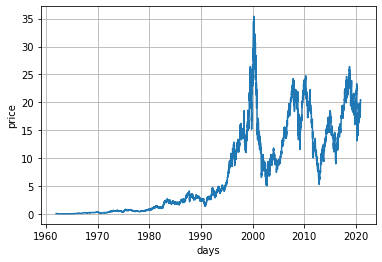

In [16]:
plt.xlabel("days")         
plt.ylabel("price")    
plt.grid()              
plt.plot(HPQ.Close)

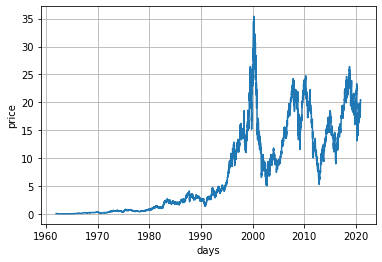

In [17]:
plt.xlabel("days")        
plt.ylabel("price")   
plt.grid()              
plt.plot(HPQ.Close)

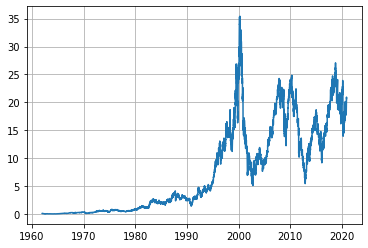

In [18]:
plt.plot(HPQ.High)
plt.grid()

In [19]:
HPQ.Open

Date
1962-01-02     0.131273
1962-01-03     0.124177
1962-01-04     0.122846
1962-01-05     0.119742
1962-01-08     0.117525
                ...    
2020-11-16    19.889999
2020-11-17    20.030001
2020-11-18    20.610001
2020-11-19    20.360001
2020-11-20    20.520000
Name: Open, Length: 14826, dtype: float64

In [21]:
print(len(HPQ.Close))
las100_days = HPQ.High[2316:2415]

14826


In [22]:
HPQ.Close

Date
1962-01-02     0.124177
1962-01-03     0.122846
1962-01-04     0.120185
1962-01-05     0.117525
1962-01-08     0.119299
                ...    
2020-11-16    20.299999
2020-11-17    20.500000
2020-11-18    20.450001
2020-11-19    20.500000
2020-11-20    20.450001
Name: Close, Length: 14826, dtype: float64

In [23]:
HPQ.Low

Date
1962-01-02     0.124177
1962-01-03     0.121516
1962-01-04     0.117968
1962-01-05     0.117525
1962-01-08     0.115307
                ...    
2020-11-16    19.740000
2020-11-17    19.850000
2020-11-18    20.440001
2020-11-19    20.129999
2020-11-20    20.330000
Name: Low, Length: 14826, dtype: float64

In [24]:
HPQ.Volume

Date
1962-01-02     2480300
1962-01-03      507300
1962-01-04      845500
1962-01-05      338200
1962-01-08      873700
                ...   
2020-11-16    11140100
2020-11-17    12321500
2020-11-18     9110300
2020-11-19     5731600
2020-11-20     7255900
Name: Volume, Length: 14826, dtype: int64

In [25]:
HPQ.High

Date
1962-01-02     0.131273
1962-01-03     0.124177
1962-01-04     0.126838
1962-01-05     0.119742
1962-01-08     0.119299
                ...    
2020-11-16    20.389999
2020-11-17    20.900000
2020-11-18    20.950001
2020-11-19    20.580000
2020-11-20    20.690001
Name: High, Length: 14826, dtype: float64

In [26]:
HPQ.Open

Date
1962-01-02     0.131273
1962-01-03     0.124177
1962-01-04     0.122846
1962-01-05     0.119742
1962-01-08     0.117525
                ...    
2020-11-16    19.889999
2020-11-17    20.030001
2020-11-18    20.610001
2020-11-19    20.360001
2020-11-20    20.520000
Name: Open, Length: 14826, dtype: float64

In [27]:
HPQ.all

<bound method DataFrame.all of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.450001  2

In [28]:
HPQ.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [29]:
HPQ.abs

<bound method NDFrame.abs of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.450001  20.

In [30]:
HPQ.add

<bound method _arith_method_FRAME.<locals>.f of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330

In [31]:
HPQ.add_prefix

<bound method NDFrame.add_prefix of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.4500

In [32]:
HPQ.add_suffix

<bound method NDFrame.add_suffix of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.4500

In [33]:
HPQ.agg

<bound method DataFrame.aggregate of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.450

In [35]:
HPQ.any

<bound method DataFrame.any of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.450001  2

In [36]:
HPQ.append

<bound method DataFrame.append of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.450001

In [37]:
HPQ.append

<bound method DataFrame.append of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.450001

In [38]:
HPQ.append

<bound method DataFrame.append of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.450001

In [39]:
HPQ.apply

<bound method DataFrame.apply of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.450001 

In [40]:
HPQ.applymap

<bound method DataFrame.applymap of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.4500

In [41]:
HPQ.asfreq

<bound method NDFrame.asfreq of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
1962-01-02   0.131273   0.131273   0.124177   0.124177   0.046861   2480300
1962-01-03   0.124177   0.124177   0.121516   0.122846   0.046359    507300
1962-01-04   0.122846   0.126838   0.117968   0.120185   0.045355    845500
1962-01-05   0.119742   0.119742   0.117525   0.117525   0.044351    338200
1962-01-08   0.117525   0.119299   0.115307   0.119299   0.045020    873700
...               ...        ...        ...        ...        ...       ...
2020-11-16  19.889999  20.389999  19.740000  20.299999  20.299999  11140100
2020-11-17  20.030001  20.900000  19.850000  20.500000  20.500000  12321500
2020-11-18  20.610001  20.950001  20.440001  20.450001  20.450001   9110300
2020-11-19  20.360001  20.580000  20.129999  20.500000  20.500000   5731600
2020-11-20  20.520000  20.690001  20.330000  20.450001  